# Functions as Arguments

**Reference**: Chapter 5 of *Computational Nuclear Engineering and Radiological Science Using Python*, R. McClarren (2018)

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:
* Pass a function as an argument to a function
* Define and use lambda functions

## Functions passed to Functions

Functions can also use other functions as part of their input. In the simple example below, f2 takes f1 as an input.  Try to predict the output before running the cell.

$$f_1(x) = 3x$$
$$f_2(x) = f_1(x) + 2$$ 

In [1]:
def f1(x):
    return x*3

def f2(f,x):
    return f(x) + 2

print(f2(f1,4))

14


Here's a more complicated example. Again, try and predict its output before you run the cell.

$$f(x) = 5(\frac{x}{3})$$
$$g(x) = f(x)^2 + 1$$

In [2]:
def my_f(x):
    return (x/3)*5

def my_g(f,x):
    return f(x)**2+1

print (my_g(my_f,6))

101.0


## Lambda Functions

Python also allows you to define a **lambda function**, which is basically a one line function without the whole <tt>def</tt> business. Here's an example where the lambda function is a line.

In [3]:
# `Normal` function definition that we've used before (old method)
def simple_line(x):
    '''solve simple expression

    Args:
        x: variable inputed value
    Returns:
        solution to the expression
    
    '''
    return 2.0*x + 1.0

The line at x = 0 is 1.0
The line at x = 1 is 3.0
The line at x = 2 is 5.0


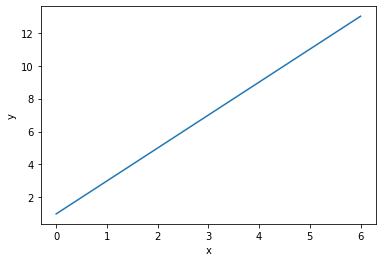

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# define the function `simple_line` with a single line of code using a lambda function (new method)
simple_line = lambda x: 2.0*x + 1.0

# Evaluate function at three values of x
print("The line at x = 0 is", simple_line(0))
print("The line at x = 1 is", simple_line(1))
print("The line at x = 2 is", simple_line(2))

# Evaluate function at many values of f
x = np.linspace(0,6,50)
y = simple_line(x)

# Make plot
plt.plot(x,y)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

Lambda functions in Python are analogous to **anonymous functions in MATLAB**.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Predict the output of the code below before you run it.
</div>

In [5]:
func_1 = (lambda x: x + x)(2)
func_2 = lambda x, y:x+y

print (func_1)
print (func_2(1,5))

4
6


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Recreate the following function as a lambda function in the cell below and check with the function answer when r = 2 cm and h = 6 cm.
</div>

In [6]:
def cylinder_surface_area(r,h):
    '''solve for the surface area of a cylinder
    
    Args:
        r: radius of cylinder (cm)
        h: height of cylinder (cm)
    Returns:
        surface area of the cylinder
    
    '''
    return 2*np.pi*r**2 + 2*np.pi*r*h
print(cylinder_surface_area(2,6),"cm^2")

100.53096491487338 cm^2


In [7]:
# Create the above function as a lambda function
### BEGIN SOLUTION
cylinder_surface_area = lambda r,h: 2*np.pi*r**2 + 2*np.pi*r*h
print(cylinder_surface_area(2,6),"cm^2")
### END SOLUTION

100.53096491487338 cm^2


You can also use lambda functions inside of other functions, shown below.

In [24]:
def my_func(n):
  return lambda y : y * n

doubler_func = my_func(2) # this creates the doubler_func with 2 being passed as n to the lambda return function
tripler_func = my_func(3)

print(doubler_func(11)) # this takes the 11 as y with the 2 already being specified as n
print(tripler_func(11))

22
33


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Copy the above function into the cell below. Modify it so that it also raises the lambda function to the nth power, then create a fun_func that passes 2 into my_func. Print fun_func(4).
</div>

In [27]:
### BEGIN SOLUTION
def my_func(n):
    return lambda y: (y * n)**n

fun_func = my_func(2)
print(fun_func(4))
### END SOLUTION

64


Sometimes you will want nested lambda functions; you will see an application in the last example in this notebook.

In [9]:
func_squared = lambda x: x**2

func_product = lambda F, m: lambda x: F(x)*m

print(func_product(func_squared, 5)(2))

20


## Tying it all together: Midpoint Integration

Recall the Midpoint formula for approximating an integral.

With only one element:

$$\int_{a}^{b} f(x) dx \approx f\left(\frac{a + b}{2}\right) (b - a)$$

With $N$ elements:

$$\int_{a}^{b} f(x) dx \approx \Delta x \sum_{i=0}^{N-1} f(m_i) ~~,$$

where $$\Delta x = \frac{b - a}{N} ~~,$$ and $$m_i = i \cdot \Delta x +\frac{\Delta x}{2} + a ~~.$$

We want to integrate an **arbitrary function** using the midpoint rule.  To do this, we need to evaluate the function at several values to calculate the midpoint sum.

In the following Python code, argument ``f`` is a **function** with a scalar input and scalar output.


In [28]:
def midpoint_rule(f,a,b,num_intervals):
    """integrate function f using the midpoint rule

    Args:
        f: function to be integrated, it must take one argument
        a: lower bound of integral range
        b: upper bound of integral range
        num_intervals: the number of intervals to break [a,b] into
    Returns:
        estimate of the integral
    """
    L = lambda a,b: (b-a) #how big is the range using a lambda function (here lambda function is interchangeable with L = (b-a))
    dx = L(a,b)/num_intervals #how big is each interval
    #midpoints are a+dx/2, a+3dx/2, ..., b-dx/2
    midpoints = np.arange(num_intervals)*dx+0.5*dx+a
    integral = 0
    for point in midpoints:
        integral += f(point)
    return integral*dx
help(midpoint_rule) # use this command to see the summary of the function in the triple quotes

Help on function midpoint_rule in module __main__:

midpoint_rule(f, a, b, num_intervals)
    integrate function f using the midpoint rule
    
    Args:
        f: function to be integrated, it must take one argument
        a: lower bound of integral range
        b: upper bound of integral range
        num_intervals: the number of intervals to break [a,b] into
    Returns:
        estimate of the integral



In [11]:
a = 1.0
dx = 1.0
midpoints = np.arange(10)*dx+0.5*dx+a

print(midpoints)

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


Thus ``midpoint_rule`` is a function that takes another function, ``f``, as an argument (input).

Now we will approximate:

$$\int_0^\pi \sin x ~ dx$$

using $N=10$ and the midpoint rule. The analytic solution (correct answer) is 2.

In [12]:
print(midpoint_rule(np.sin,0,np.pi,10))

2.0082484079079745


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Approximate the integral below using the midpoint formula with 5 intervals. Store your answer in <tt>approx_integral</tt>.
</div>

$$\int_\pi^{2 \pi} x \cos x ~ dx$$

In [29]:
### BEGIN SOLUTION
def my_f(x):
    return np.cos(x) * x

approx_integral = midpoint_rule(my_f,np.pi,2*np.pi,5)
print(approx_integral)
### END SOLUTION

1.9659448856595125


In [14]:
### BEGIN HIDDEN TESTS
import math
assert math.fabs(approx_integral - 1.97) < 0.03, "Answer not correct. Make sure you are using the correct number of elements."
### END HIDDEN TESTS

### Convergence Analysis

*At what rate does an approximation converge to the true solution?* is a central question in numerical analysis.

Let's characterize the convergence of the midpoint approximation for this particular integral.

We will consider the following values of N:
[       1       10      100     1000    10000   100000  1000000 10000000]
 
Considering N = 1
Considering N = 10
Considering N = 100
Considering N = 1000
Considering N = 10000
Considering N = 100000
Considering N = 1000000
Considering N = 10000000


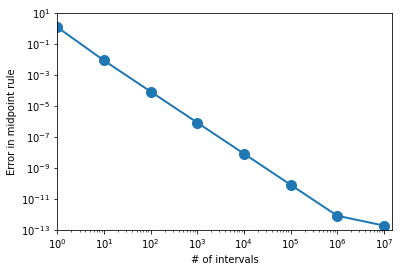

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define values of N to consider
num_intervals = 8 #number of interval sizes
intervals = 10**np.arange(num_intervals) #run several different intervals
print("We will consider the following values of N:")
print(intervals)
print(" ")


# Allocate an array to store result
integral_error = np.zeros(num_intervals)

# Define integration limits
a = 0
b = np.pi

# Loop over different values of N
count = 0
for interval in intervals:
    print("Considering N =",interval)
    integral_error[count] = np.fabs(2 - midpoint_rule(np.sin,a,b,interval))
    count += 1

# Create figure
fig = plt.figure()
ax = fig.add_subplot(111)
import matplotlib.ticker as mtick
plt.loglog(intervals,integral_error,marker="o",markersize = 10,linewidth=2);
plt.xlabel("# of intervals")
plt.ylabel("Error in midpoint rule")
plt.axis([1,1.5e7,1.0e-13,10])
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Copy the code from above to below. Adapt it to analyze the integal from the previous home activity.
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Approximate the exponential integration function below using the midpoint formula.
</div>

Approximate the exponential integral function:
$$E_n(x) = \int\limits_1^\infty \frac{e^{-xt}}{t^n} ~ \!dt ~.$$

Use $N = 10^6$ element, $x=1$, $n=1$, and an upper bound of 10,000 (instead of infinity).

In [16]:
def exp_int_argument(t,n=1,x=1):
    ''' Exponential function integrand
    
    Arguments:
        t: scalar
        n: scalar, default is n=1
        x: scalar, default is x=1
    
    Returns:
        f: value of integrand at t,n,x
    '''
    
    ###BEGIN SOLUTION
    f = np.exp(-x*t)/t**n
    return f

approx_exp_integral = midpoint_rule(exp_int_argument, 1, 10000, 10**6)
print(approx_exp_integral)
###END SOLUTION


0.21938086941811155


The exact answer is 0.2193839343.

### A Fancier Integration Function

Using matplotlib we can make an even fancier integration function

0.0

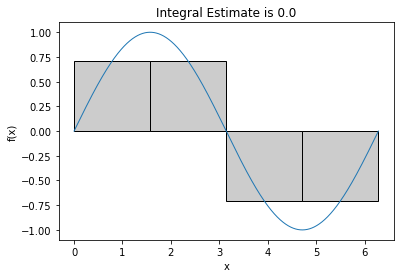

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def midpoint_rule_graphical(f,a,b,num_intervals,filename):
    """integrate function f using the midpoint rule

    Args:
        f: function to be integrated, it must take one argument
        a: lower bound of integral range
        b: upper bound of integral range
        num_intervals: the number of intervals to break [a,b] into
    Returns:
        estimate of the integral
    Side Effect:
        Plots intervals and areas of midpoint rule
    """
    # Create plot
    ax = plt.subplot(111)
    
    # Setup, similar to previous midpoint_rule function
    L = (b-a) #how big is the range
    dx = L/num_intervals #how big is each interval
    midpoints = np.arange(num_intervals)*dx+0.5*dx+a
    x = midpoints
    #y = np.zeros(num_intervals)
    integral = 0
    count = 0
    
    # Loop over points
    for point in midpoints:
        # Evaluate function f
        #y[count] = f(point)
        
        # Calculate integral
        integral = integral + f(point)
        
        # Calculate verticies for plots
        verts = [(point-dx/2,0)] + [(point-dx/2,f(point))]
        verts += [(point+dx/2,f(point))] + [(point+dx/2,0)]
        
        # Draw rectangles
        poly = plt.Polygon(verts, facecolor='0.8', edgecolor='k')
        ax.add_patch(poly)
        
        # Incrememnt counter
        count += 1
    # y = f(x)
    
    # Draw smooth line for f
    smooth_x = np.linspace(a,b,10000)
    smooth_y = f(smooth_x)
    plt.plot(smooth_x, smooth_y, linewidth=1)
    
    # Add labels and title
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Integral Estimate is " + str(integral*dx))
    
    # Save figure
    plt.savefig(filename)
    
    # Return approximation for integral
    return integral*dx

# Call function
midpoint_rule_graphical(np.sin,0,2*np.pi,4,'C4_fig7.pdf')

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Also apply to the previous class example. The code below will not work until <tt>exp_int_argument</tt> is defined correctly.
</div>

Answer is 0.2193839343
Our appoximation with upper bound 5 and 100 points is 0.21818671430783745


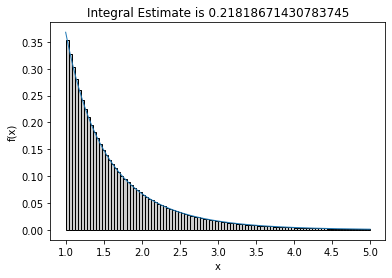

In [18]:
num_points = 100
upper_bound = 5
print("Answer is 0.2193839343")
print("Our appoximation with upper bound",upper_bound,"and",num_points,"points is"
      ,midpoint_rule_graphical(exp_int_argument,1,upper_bound,num_points,'C4_fig8.pdf'))

### Incorporating Lambda Functions with Midpoint Integration

We can use lambda functions in our midpoint integration routine as well. Here we define a Gaussian as the integrand:

$$\int_{-\infty}^{\infty} \frac{e^{-x^2}}{\sqrt{\pi}} dx$$

The analytic answer to the integral is 1.

0.999980808068639

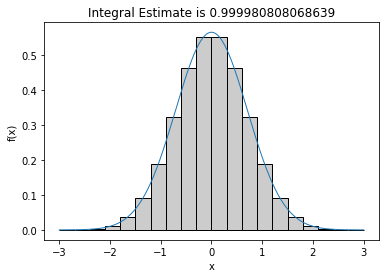

In [19]:
# Define lambda function
gaussian = lambda x: np.exp(-x**2)/np.sqrt(np.pi) #function to compute gaussian

# Approximate integral using lambda function
midpoint_rule_graphical(gaussian,-3,3,20,'C4-with-lambda-func.pdf')

0.999980808068639

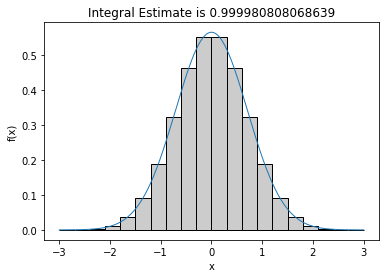

In [20]:
# Approximate integral with more manual approach
midpoint_rule_graphical(lambda x: np.exp(-x**2)/np.sqrt(np.pi),-3,3,20,'C4-without-lambda-func.pdf')

### Extension to Two Dimensional Functions

We will revisit numeric integration at the end of the semester. We can use two lambda functions to extend the midpoint rule to integrate two dimensional functions, such as

$$\int_{0}^{\pi} \int_{0}^{\pi} \sin(x) \sin(y) dx dy ~~.$$

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Spend 5-10 minutes brainstorming how to approximate a 2 dimensional integral by calling the <tt>midpoint_rule</tt> function twice (nested).
</div>

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Walk through the code below together.
</div>

In [21]:
def midpoint_2D(f,ax,bx,ay,by,num_intervals_x,num_intervals_y):
    """Midpoint rule extended to 2D functions
    
    Arguments:
        f: function to be integrated. Takes two scalar inputs (x,y) and returns a scalar.
        ax: lower bound for dimension 1
        bx: upper bound for dimension 1
        ay: lower bound for dimension 2
        by: upper bound for dimension 2
        num_intervals_x: number of intervals for dimension 1
        num_intervals_y: number of intervals for dimension 2
    
    Returns:
        approximation to integral (scalar)
    
    """
    
    # For a given y, calculate the integral in dimension 1 (from ax to bx) using midpoint rule
    integral_over_x = lambda y: midpoint_rule(lambda x: f(x,y),ax,bx,num_intervals_x)
    
    # Apply midpoint rule to dimension 2
    return midpoint_rule(integral_over_x,ay,by,num_intervals_y)

# 
sin2 = lambda x,y:np.sin(x)*np.sin(y)
print("Estimate of the integral of sin(x)sin(y), over [0,pi] x [0,pi] is",
      midpoint_2D(sin2,0,np.pi,0,np.pi,1000,1000))

Estimate of the integral of sin(x)sin(y), over [0,pi] x [0,pi] is 4.000003289869757


This code snippet defines one lambda function that takes care of the x argument to f, and another that defines the integral over x for a given y, this second function is passed to the midpoint rule. 

The way that this works is that when the second midpoint rule evaluates <tt>integral_over_x</tt> at a certain point in y, it evaluates the integral over all x at that point. 